X Measurement Results: [0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756864458805, 0.07764756

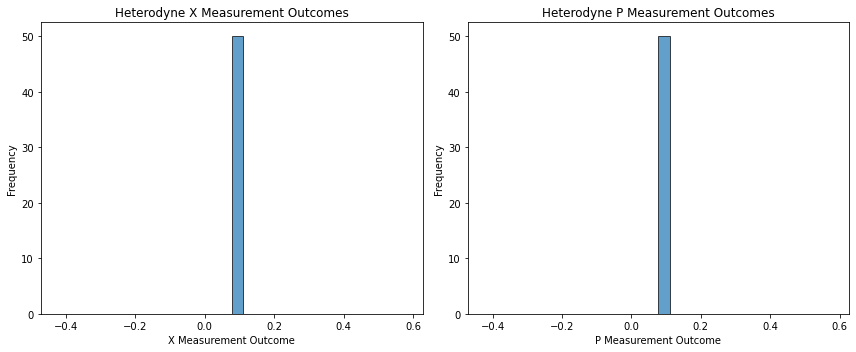

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Kuadratur operatörlerini tanımla
def quadrature_operator(N, theta):
    a = destroy(N)
    return (a * np.exp(-1j * theta) + a.dag() * np.exp(1j * theta)).unit()

# Koherent durumu tanımla
alpha = 1.0 + 1.0j  # Kompleks koherent durum
N = 10  # Hilbert uzayı boyutu
state = coherent(N, alpha)

# Kuadratur operatörleri
X_op = quadrature_operator(N, 0)
P_op = quadrature_operator(N, np.pi / 2)

# Monte Carlo simülasyonu için ölçüm sayısını belirle
num_measurements = 50
X_results = []
P_results = []

# Ölçümleri gerçekleştir ve sonuçları kaydet
for _ in range(num_measurements):
    X_result = np.real(state.dag() * X_op * state)
    P_result = np.real(state.dag() * P_op * state)
    X_results.append(X_result)
    P_results.append(P_result)

# Ölçüm sonuçlarını yazdır
print("X Measurement Results:", X_results)
print("P Measurement Results:", P_results)

# Histogramları çiz
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X_results, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('X Measurement Outcome')
plt.ylabel('Frequency')
plt.title('Heterodyne X Measurement Outcomes')

plt.subplot(1, 2, 2)
plt.hist(P_results, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('P Measurement Outcome')
plt.ylabel('Frequency')
plt.title('Heterodyne P Measurement Outcomes')

plt.tight_layout()
plt.show()
